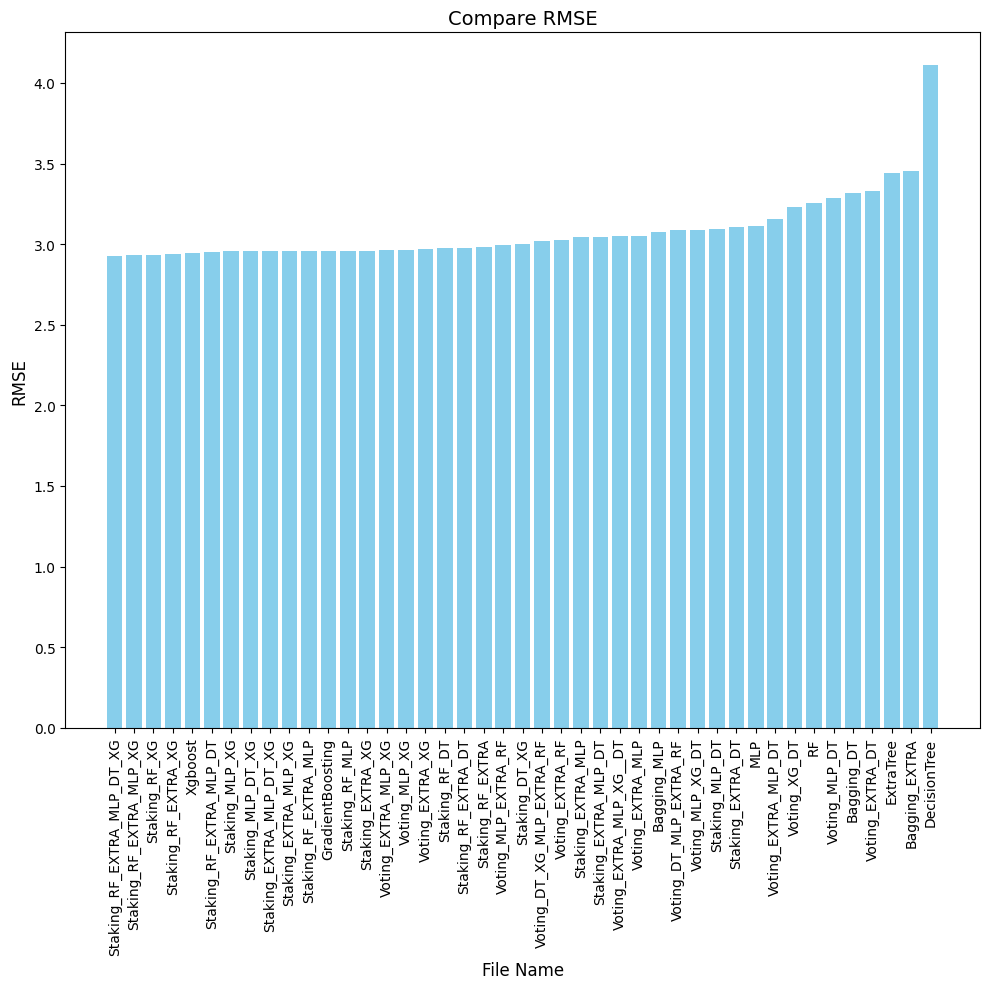

In [17]:
import os
import pickle
import math
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from utils.get_models_from_result import load_rmse_from_pkl, plot_rmse
from enums.enums import Rmse, Data

remse_datss = {}

# 폴더 내 모든 파일을 순회
for filename in os.listdir('result_model_fold/Swanton_OH'):
    if filename.endswith(".pkl"):
        file_path = os.path.join('result_model_fold/Swanton_OH', filename)

        # pkl 파일 불러오기
        with open(file_path, 'rb') as file:
            data = pickle.load(file)
            remse_datss[filename.replace('_model_with_Swanton_OH.pkl','')] = math.sqrt(mean_squared_error(data[Data.TEST_OUTPUT_DATA], data[Data.PREDICTED_OUTPUT_DATA]))
sorted_remse_datss = sorted(remse_datss.items(), key=lambda item: item[1])

# 파일 이름과 RMSE 값 분리
files = [item[0] for item in sorted_remse_datss]
rmse_values = [item[1] for item in sorted_remse_datss]

# 그래프 그리기
plt.figure(figsize=(10, 10))
plt.bar(files, rmse_values, color='skyblue')
plt.xlabel('File Name', fontsize=12)
plt.ylabel('RMSE', fontsize=12)
plt.title('Compare RMSE', fontsize=14)
# y축 범위 설정
# plt.ylim(2.9, 3)
# x축 파일 이름이 잘 보이게 회전
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()